In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display full columns
pd.set_option('display.max_columns', None)

# Paths
gini_path = '../data/gini.csv'
press_path = '../data/press_freedom.csv'


In [3]:
gini_raw = pd.read_csv("data/gini.csv", skiprows=4)
gini_raw.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Step 1: Keep only 'Country Name' and year columns
# Drop metadata columns
columns_to_keep = ['Country Name'] + [str(y) for y in range(2000, 2024)]
gini_clean = gini_raw[columns_to_keep].copy()
gini_clean.rename(columns={'Country Name': 'Country'}, inplace=True)

# Step 2: Melt to long format
gini_long = gini_clean.melt(id_vars='Country', var_name='Year', value_name='Gini')
gini_long.dropna(inplace=True)
gini_long['Year'] = gini_long['Year'].astype(int)

# Check the result
gini_long.head()


,Country,Year,Gini
4,Angola,2000,51.9
9,Argentina,2000,51.0
14,Austria,2000,29.0
17,Belgium,2000,33.1
20,Bangladesh,2000,33.4


In [5]:
press_df = pd.read_csv("data/press_freedom.csv", encoding='ISO-8859-1')
press_df.head()


,Year,Country,ISO,Rank,Score,Zone
0,2023.0,Norway,NOR,1.0,95.18,UE Balkans
1,2023.0,Ireland,IRL,2.0,89.91,UE Balkans
2,2023.0,Denmark,DNK,3.0,89.48,UE Balkans
3,2023.0,Sweden,SWE,4.0,88.15,UE Balkans
4,2023.0,Finland,FIN,5.0,87.94,UE Balkans


In [6]:

# Select relevant columns only
press_df = press_df[['Country', 'Year', 'Score']]  # Score = Press Freedom Index
press_df.rename(columns={'Score': 'PressFreedom'}, inplace=True)

# Drop missing
press_df.dropna(inplace=True)

# Convert year to int just in case
press_df['Year'] = press_df['Year'].astype(int)

# Final check
press_df.head()



,Country,Year,PressFreedom
0,Norway,2023,95.18
1,Ireland,2023,89.91
2,Denmark,2023,89.48
3,Sweden,2023,88.15
4,Finland,2023,87.94


In [7]:
merged_df = pd.merge(gini_long, press_df, on=['Country', 'Year'], how='inner')
merged_df.head()


,Country,Year,Gini,PressFreedom
0,United Arab Emirates,2013,32.5,66.51
1,Argentina,2013,41.1,74.33
2,Armenia,2013,30.6,71.96
3,Austria,2013,30.8,90.60
4,Burundi,2013,38.6,61.98


In [8]:
merged_df.describe()


,Year,Gini,PressFreedom
count,723.000000,723.000000,723.000000
mean,2017.477178,36.174827,71.508492
std,2.926234,7.248762,13.515602
min,2013.000000,24.000000,19.040000
25%,2015.000000,30.800000,65.645000
50%,2017.000000,35.000000,71.350000
75%,2020.000000,40.600000,80.770000
max,2023.000000,63.000000,93.620000


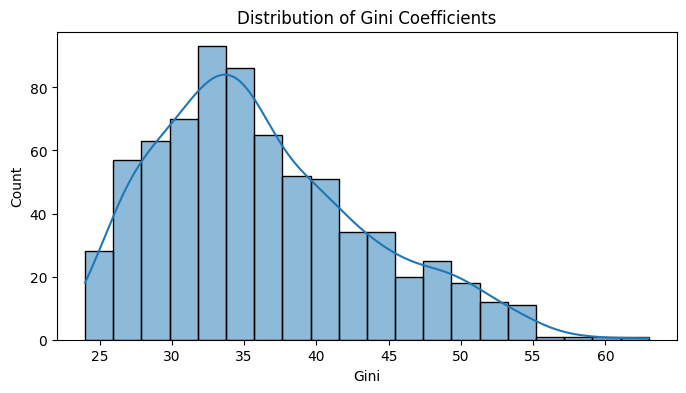

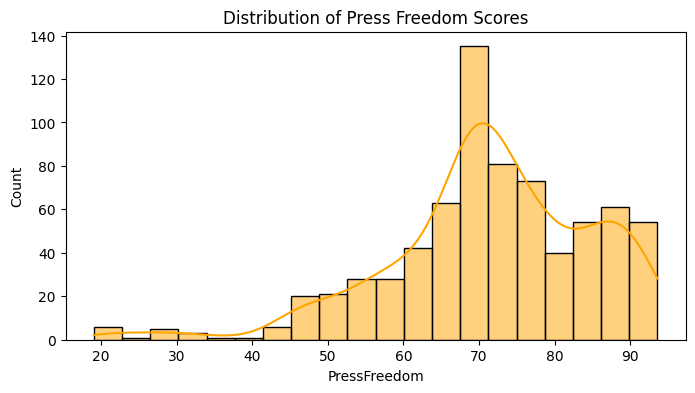

In [9]:
# Gini Distribution
plt.figure(figsize=(8,4))
sns.histplot(merged_df['Gini'], bins=20, kde=True)
plt.title('Distribution of Gini Coefficients')
plt.show()

# Press Freedom Distribution
plt.figure(figsize=(8,4))
sns.histplot(merged_df['PressFreedom'], bins=20, kde=True, color='orange')
plt.title('Distribution of Press Freedom Scores')
plt.show()


In [10]:
# Top 5 most free press
print("Top 5 Countries by Press Freedom (Lowest Scores):")
print(merged_df.sort_values('PressFreedom').head(5)[['Country', 'Year', 'PressFreedom', 'Gini']])

# Bottom 5 most repressive
print("\nBottom 5 Countries by Press Freedom (Highest Scores):")
print(merged_df.sort_values('PressFreedom', ascending=False).head(5)[['Country', 'Year', 'PressFreedom', 'Gini']])

# Least and most equal
print("\nTop 5 Countries with Lowest Income Inequality:")
print(merged_df.sort_values('Gini').head(5)[['Country', 'Year', 'Gini', 'PressFreedom']])

print("\nTop 5 Countries with Highest Income Inequality:")
print(merged_df.sort_values('Gini', ascending=False).head(5)[['Country', 'Year', 'Gini', 'PressFreedom']])


Top 5 Countries by Press Freedom (Lowest Scores):
    Country  Year  PressFreedom  Gini
235   China  2016         19.04  38.5
461   China  2019         21.08  38.2
588   China  2021         21.28  35.7
531   China  2020         21.52  37.1
383   China  2018         21.71  38.5

Bottom 5 Countries by Press Freedom (Highest Scores):
         Country  Year  PressFreedom  Gini
24       Finland  2013         93.62  27.2
96       Finland  2014         93.60  26.8
126  Netherlands  2014         93.54  28.6
49   Netherlands  2013         93.52  28.1
127       Norway  2014         93.48  26.8

Top 5 Countries with Lowest Income Inequality:
      Country  Year  Gini  PressFreedom
570  Slovenia  2020  24.0         77.36
141   Ukraine  2014  24.0         63.07
358  Slovenia  2017  24.2         78.30
636  Slovenia  2021  24.3         76.90
692  Slovenia  2022  24.3         68.54

Top 5 Countries with Highest Income Inequality:
          Country  Year  Gini  PressFreedom
145  South Africa  2014  63.

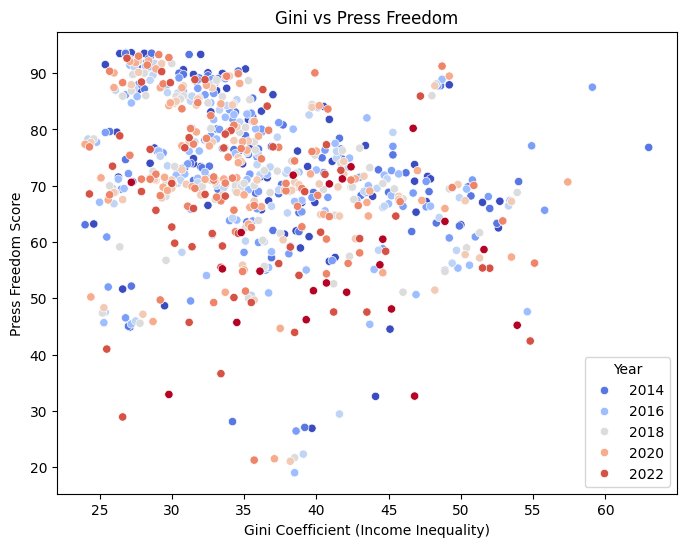

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged_df, x='Gini', y='PressFreedom', hue='Year', palette='coolwarm')
plt.title('Gini vs Press Freedom')
plt.xlabel('Gini Coefficient (Income Inequality)')
plt.ylabel('Press Freedom Score')
plt.show()


                  Gini  PressFreedom
Gini          1.000000     -0.279233
PressFreedom -0.279233      1.000000


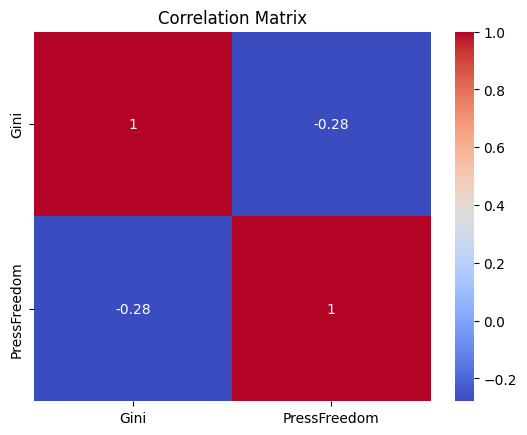

In [12]:
correlation = merged_df[['Gini', 'PressFreedom']].corr(method='pearson')
print(correlation)
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Covariance Matrix:
                   Gini  PressFreedom
Gini          52.544546    -27.356819
PressFreedom -27.356819    182.671489


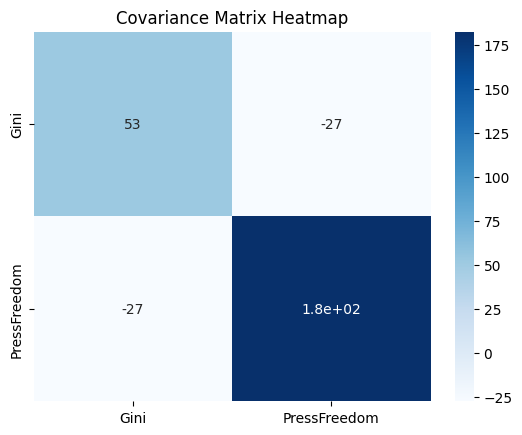

In [13]:
# Covariance Matrix
cov_matrix = merged_df[['Gini', 'PressFreedom']].cov()
print("Covariance Matrix:")
print(cov_matrix)

# Heatmap for visual
sns.heatmap(cov_matrix, annot=True, cmap="Blues")
plt.title("Covariance Matrix Heatmap")
plt.show()


In [14]:
from sklearn.preprocessing import StandardScaler

# Select features
X = merged_df[['Gini', 'PressFreedom']]

# Scale them
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [15]:
from sklearn.cluster import KMeans

# Choose number of clusters (start with 3)
kmeans = KMeans(n_clusters=3, random_state=42)
merged_df['Cluster'] = kmeans.fit_predict(X_scaled)


In [16]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_scaled, merged_df['Cluster'])
print(f"Silhouette Score for k=3: {sil_score:.3f}")


Silhouette Score for k=3: 0.431


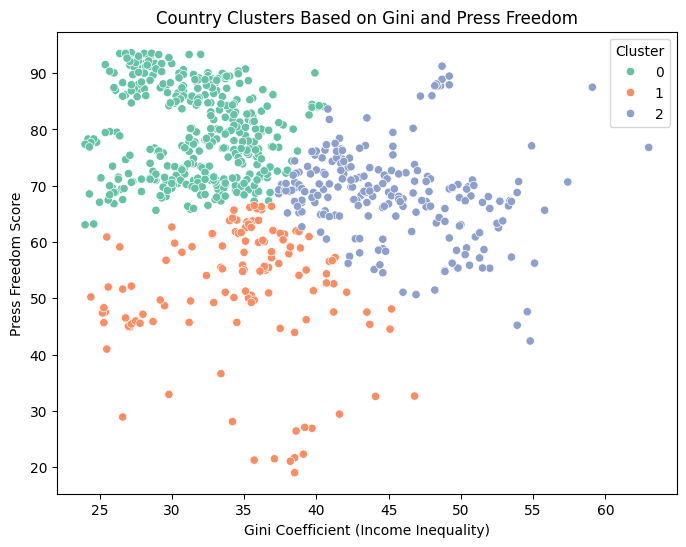

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_df, x='Gini', y='PressFreedom', hue='Cluster', palette='Set2')
plt.title("Country Clusters Based on Gini and Press Freedom")
plt.xlabel("Gini Coefficient (Income Inequality)")
plt.ylabel("Press Freedom Score")
plt.legend(title="Cluster")
plt.show()


In [18]:
# Cluster-wise descriptive statistics
cluster_summary = merged_df.groupby('Cluster')[['Gini', 'PressFreedom']].agg(['mean', 'std', 'min', 'max']).round(2)
display(cluster_summary)


Gini                   PressFreedom                     
          mean   std   min   max         mean    std    min    max
Cluster                                                           
0        31.68  3.57  24.0  40.5        79.57   8.14  63.07  93.62
1        34.93  4.95  24.4  46.8        51.66  11.56  19.04  66.50
2        45.04  5.00  37.4  63.0        68.58   8.05  42.43  91.24

In [19]:
# Country cluster summary
cluster_map = merged_df.groupby(['Country', 'Cluster']).size().reset_index(name='Count')
display(cluster_map.head(10))



,Country,Cluster,Count
0,Albania,0,7
1,Angola,2,1
2,Argentina,2,10
3,Armenia,0,11
4,Australia,0,3
5,Austria,0,10
6,Bangladesh,1,2
7,Belarus,1,8
8,Belgium,0,10
9,Belize,2,1


In [20]:
#  ANOVA test to compare PressFreedom across clusters
from scipy.stats import f_oneway

group0 = merged_df[merged_df['Cluster'] == 0]['PressFreedom']
group1 = merged_df[merged_df['Cluster'] == 1]['PressFreedom']
group2 = merged_df[merged_df['Cluster'] == 2]['PressFreedom']

anova_result = f_oneway(group0, group1, group2)

print("ANOVA F-statistic:", anova_result.statistic)
print("ANOVA p-value:", anova_result.pvalue)

if anova_result.pvalue < 0.05:
    print("✅ Result: Statistically significant difference between clusters.")
else:
    print("❌ Result: No significant difference between clusters.")


ANOVA F-statistic: 491.722398906636
ANOVA p-value: 2.2992996288833218e-135
✅ Result: Statistically significant difference between clusters.


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# X = predictor(s), y = target
X = merged_df[['Gini']]           # Independent variable
y = merged_df['PressFreedom']     # Dependent variable


In [24]:
import numpy as np
# Baseline model: predict mean of y
y_mean = np.full_like(y, y.mean())
baseline_rmse = np.sqrt(mean_squared_error(y, y_mean))
print(f"Baseline RMSE (predict mean): {baseline_rmse:.2f}")


Baseline RMSE (predict mean): 13.51


In [25]:
reg = LinearRegression()
reg.fit(X, y)

# Predict
y_pred = reg.predict(X)


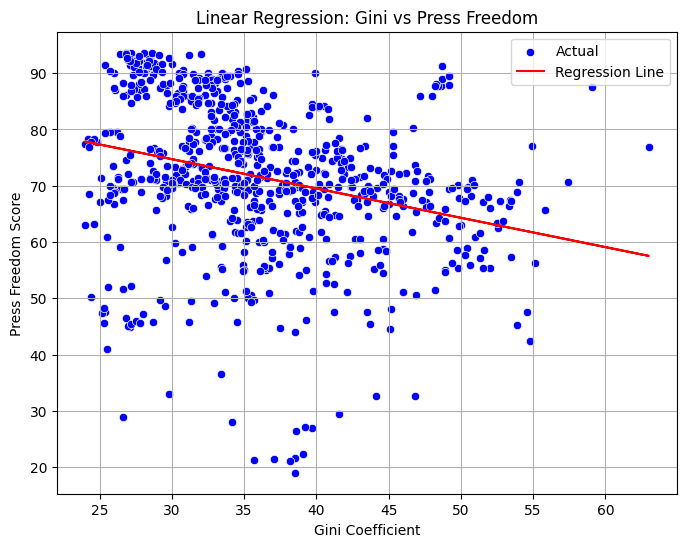

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X['Gini'], y=y, label='Actual', color='blue')
plt.plot(X['Gini'], y_pred, color='red', label='Regression Line')
plt.xlabel('Gini Coefficient')
plt.ylabel('Press Freedom Score')
plt.title('Linear Regression: Gini vs Press Freedom')
plt.legend()
plt.grid(True)
plt.savefig("regression_gini_pressfreedom.png", dpi=300)
plt.show()


In [27]:
import numpy as np
print("Intercept:", reg.intercept_)
print("Slope (Coefficient for Gini):", reg.coef_[0])

r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")



Intercept: 90.34257296463849
Slope (Coefficient for Gini): -0.5206405137733472
R² Score: 0.0780
RMSE: 12.97


In [28]:
# Summary Table for Simple Model
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

simple_r2 = r2_score(y, y_pred)
simple_rmse = np.sqrt(mean_squared_error(y, y_pred))

model_comparison = pd.DataFrame({
    'Model': ['Baseline (Mean)', 'Simple Linear Regression'],
    'R² Score': [0.0, simple_r2],
    'RMSE': [baseline_rmse, simple_rmse]
})
display(model_comparison)



,Model,R² Score,RMSE
0,Baseline (Mean),0.000000,13.506252
1,Simple Linear Regression,0.077971,12.969019


## Final Metrics Summary

- **Simple Linear Regression**
  - R² Score: 0.078
  - RMSE: 12.97
  - Regression Equation: PressFreedom = 90.34 - 0.52 × Gini

- **ANOVA Across Clusters**
  - F-statistic: 491.722398906636
  - p-value: 2.2992996288833218e-135

- **Pearson Correlation between Gini and Press Freedom**: -0.279
- **Covariance Matrix**: Printed above

##  Final Takeaways
- Countries with high income inequality generally have lower press freedom.
- Linear regression confirms a weak but consistent negative trend.
- Clustering reveals three distinct country groups with interpretable profiles.
- ANOVA test validates that clusters are statistically meaningful.
